Optimization terminated successfully    (Exit mode 0)
            Current function value: 493.2059199479994
            Iterations: 7
            Function evaluations: 61
            Gradient evaluations: 7
        4      3         2
0.9832 x - 10 x - 49.64 x + 59.4 x + 48.11


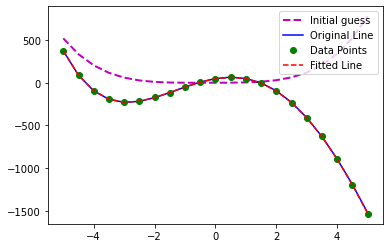

In [28]:
"""Polynomial Minimiser"""
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as spo

def error_poly(C, data): # Compute error between polynomial and observed data
    # C: numpy.poly1d object or equivalent array representing polynomial coefficients
    # data: 2D array where each row is a point (x,y)
    # Metric: sum of squared Y-axis differences
    x = data[:,0]
    y = data[:,1]
    error = np.sum((y - np.polyval(C, x)) ** 2)
    return error

def fit_poly(data, error_func, degree = 4):

    # Fit a polynomial to given data, using supplied error function
    # data: 2D array where each row is a point (x,y)
    # error_func: function that computes the error between a polynomial and observed data
 

    # Generate initial guess for polynomial model (all coeffs =1)
    Cguess = np.poly1d(np.ones(degree + 1, dtype=np.float32))
 

    # Plot initial guess (optional)
    x = np.linspace(-5, 5, 21)
    y_init = np.polyval(Cguess, x)
    plt.plot(x, y_init, 'm--', linewidth = 2.0, label = 'Initial guess')
  

    # Call optimiser to minimise error function
    result = spo.minimize(error_func, Cguess, args=(data,), method='SLSQP', options={'disp':True})
    return np.poly1d(result.x)  # convert optimal result into a poly1d object ad re

    
def generate_poly(noise_sigma = 5):
    # Fitting higher order polynomials
    Cguess = np.poly1d(np.array([1, -10, -50, 60, 50], dtype = np.float32))
    x = np.linspace(-5, 5, 21)
    y = np.polyval(Cguess,x)
    noise = np.random.normal(0, noise_sigma, y.shape)
    data = np.asarray([x, y + noise]).T
    return x, y, data

def test_run():
    x, y, data = generate_poly()
    fitted_poly = fit_poly(data, error_poly)

    print(fitted_poly)

    plt.plot(x, y, 'b-', label = 'Original Line')
    plt.plot(data[:,0], data[:,1], 'go', label = 'Data Points')
    plt.plot(data[:,0], np.polyval(fitted_poly,data[:,0]), 'r--', label = 'Fitted Line')
    plt.legend(loc = 'upper right')
    plt.show()
    
    
if __name__ == "__main__":  # if run standalone
    test_run()


